In [ ]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

!pip install --upgrade pip
!pip install -q konlpy

!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

!pip install -q newspaper3k

In [ ]:
import requests
import newspaper
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from konlpy.tag import Mecab
from collections import Counter

In [22]:
def get_words_from_kookbang():
    
    url = 'https://kookbang.dema.mil.kr/newsWeb/allToday.do'
   
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    selectors = [#'#기획 > ul > li > a', 
                 '#국방 > ul > li > a', 
                 #'#국정·일반 > ul > li > a',
                 '#오피니언 > ul > li > a',
                 #'#엔터·스포츠 > ul > li > a',
                 ]
    news_text = ''      

    for s in selectors:
        li_list = soup.select(s)
        for l in li_list:
            l = str(l)
            idx1 = l.find('a href=')
            idx2 = l.find('view.do')

            link = l[idx1+9:idx2+7]       
            link = 'https://kookbang.dema.mil.kr/' + link
            print(link)

            # 뉴스 본문
            article = newspaper.Article(link, language='ko')
            article.download()
            article.parse()
            news_text += article.text
        

    # konlpy, Mecab: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
    engine = Mecab() 
    nouns = engine.nouns(news_text)
    nouns = [n for n in nouns if len(n) > 1]

    # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
    count = Counter(nouns)
    tags = count.most_common(40)

    return tags

In [23]:
tags = get_words_from_kookbang()

https://kookbang.dema.mil.kr/newsWeb/20220728/8/BBSMSTR_000000010021/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/4/BBSMSTR_000000010021/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/7/BBSMSTR_000000010021/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/1/BBSMSTR_000000010023/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/3/BBSMSTR_000000010024/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/2/BBSMSTR_000000010024/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/1/BBSMSTR_000000010024/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/1/BBSMSTR_000000010025/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/1/BBSMSTR_000000010022/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/1/BBSMSTR_000000010027/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/4/BBSMSTR_000000010028/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/1/BBSMSTR_000000010028/view.do
https://kookbang.dema.mil.kr/newsWeb/20220728/6/BBSMSTR_000000010028/view.do

In [28]:
tags

[('훈련', 56),
 ('기술', 33),
 ('체계', 33),
 ('기자', 26),
 ('장병', 26),
 ('작전', 25),
 ('사업', 21),
 ('교육', 21),
 ('화생방', 21),
 ('전쟁', 20),
 ('행사', 20),
 ('생각', 18),
 ('발전', 18),
 ('부대', 18),
 ('상황', 18),
 ('저작권자', 17),
 ('국방일보', 17),
 ('무단', 17),
 ('전재', 17),
 ('배포', 17),
 ('금지', 17),
 ('참전', 17),
 ('전투', 17),
 ('사람', 17),
 ('우리', 16),
 ('해군', 16),
 ('임무', 16),
 ('지원', 16),
 ('차량', 16),
 ('중대', 15),
 ('용사', 14),
 ('협력', 14),
 ('잠수함', 14),
 ('미군', 13),
 ('노력', 13),
 ('아들', 13),
 ('업무', 13),
 ('시설', 13),
 ('사단', 13),
 ('여단', 13)]

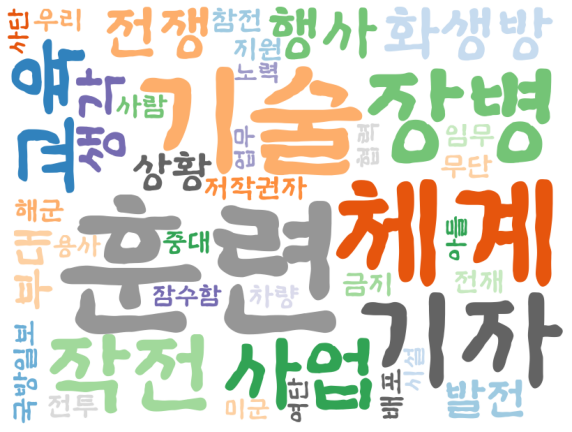

In [27]:
wc = WordCloud(font_path='../files/호국체Bold_TTF.ttf', background_color='white', colormap='tab20c', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)